In [0]:
# Fill in your name using the format below and student ID number
your_name = "Maas, Kirsten"
student_id = "0988693"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

In [17]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [19]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Kirsten, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/assignment-3-kirstenmaas' # For Google Colab

In [20]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

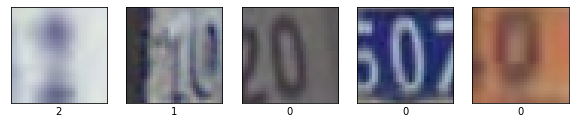

In [26]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [0]:
def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(1536, activation='tanh'))
    model.add(layers.Dense(768, activation='tanh'))
    model.add(layers.Dense(384, activation='tanh'))
    model.add(layers.Dense(192, activation='tanh'))
    model.add(layers.Dense(96, activation='tanh'))    
    model.add(layers.Dense(48, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model


run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=32)

answer_q_1_1 = """The layers are experimented with which showed that wide layers and small gaps in number of nodes avoid loosing of information. Learning rate, batch size and activation functions are experimented with. The small learning rate avoids increase of training loss. Batch size and tanh showed best results in accuracy. Early stopping is applied for epochs, so stop when val accuracy decreases. Performance is good, but there is overfitting visible in the val loss as it increases after 25 epochs."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

Training the model
Epoch 1/50
1986/1986 [==============================] - 9s 5ms/step - loss: 1.7571 - accuracy: 0.3966 - val_loss: 1.6542 - val_accuracy: 0.4412
Epoch 2/50
1986/1986 [==============================] - 9s 4ms/step - loss: 1.2138 - accuracy: 0.6093 - val_loss: 1.1546 - val_accuracy: 0.6350
Epoch 3/50
1986/1986 [==============================] - 9s 4ms/step - loss: 1.0185 - accuracy: 0.6770 - val_loss: 1.1119 - val_accuracy: 0.6408
Epoch 4/50
1986/1986 [==============================] - 9s 4ms/step - loss: 0.9062 - accuracy: 0.7135 - val_loss: 0.9786 - val_accuracy: 0.6869
Epoch 5/50
1986/1986 [==============================] - 9s 4ms/step - loss: 0.8277 - accuracy: 0.7357 - val_loss: 0.8233 - val_accuracy: 0.7435
Epoch 6/50
1986/1986 [==============================] - 9s 4ms/step - loss: 0.7700 - accuracy: 0.7568 - val_loss: 0.7532 - val_accuracy: 0.7647
Epoch 7/50
1986/1986 [==============================] - 9s 5ms/step - loss: 0.7162 - accuracy: 0.7733 - val_loss: 0.7

KeyboardInterrupt: ignored

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(768, activation='tanh'))
    model.add(layers.Dense(384, activation='tanh'))
    model.add(layers.Dense(192, activation='tanh'))
    model.add(layers.Dense(96, activation='tanh'))    
    model.add(layers.Dense(48, activation='tanh'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_2 = """
               The preprocessing is applied by greyscaling on the training and validation data.
               The size of the input layer changed due to the greyscaling, so to remain the pyramid structure the second layer is removed.
               The results have improved as the accuracies scores are slightly higher and the loss scores are lower. 
               The validation loss is less unstable. The network still shows overfitting, but less and starts later at 40 epochs.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

Training the model
Epoch 1/50
1986/1986 [==============================] - 7s 3ms/step - loss: 1.7425 - accuracy: 0.4109 - val_loss: 1.4604 - val_accuracy: 0.5218
Epoch 2/50
1986/1986 [==============================] - 6s 3ms/step - loss: 1.1909 - accuracy: 0.6227 - val_loss: 1.1496 - val_accuracy: 0.6318
Epoch 3/50
1986/1986 [==============================] - 6s 3ms/step - loss: 1.0132 - accuracy: 0.6822 - val_loss: 1.0267 - val_accuracy: 0.6629
Epoch 4/50
1986/1986 [==============================] - 6s 3ms/step - loss: 0.9029 - accuracy: 0.7163 - val_loss: 0.8459 - val_accuracy: 0.7427
Epoch 5/50
1986/1986 [==============================] - 6s 3ms/step - loss: 0.8346 - accuracy: 0.7372 - val_loss: 0.8922 - val_accuracy: 0.7205
Epoch 6/50
1977/1986 [============================>.] - ETA: 0s - loss: 0.7777 - accuracy: 0.7566

KeyboardInterrupt: ignored

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

In [0]:
from keras import regularizers

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(768, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(384, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(192, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(96, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(48, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_3 = """
                Little regularization was applied as only little overfitting is visible in Q1.2.
                Tanh still outperformed ReLu.
                L1 regularization and dropout did not perform well as they both caused underfitting, no matter the parameter. 
                Batch normalization outperformed L2 regularization.
                The resulting curve is smooth. No overfitting is visible for 50 epochs. Validation accuracy has increased too.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

Using TensorFlow backend.


Training the model
Epoch 1/50
1570/1986 [======================>.......] - ETA: 2s - loss: 2.2279 - accuracy: 0.2186

KeyboardInterrupt: ignored

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6400)             

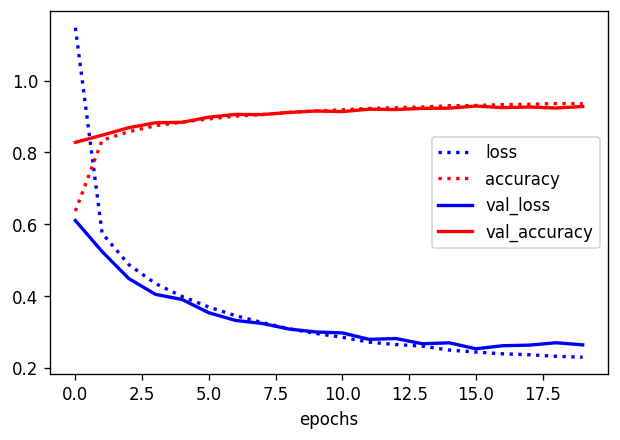

In [0]:
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,1)))
    # model.add(layers.MaxPooling2D((1, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu')) #64
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=20, batch_size=32)
answer_q_2_1 = """
               As a base I used the CNN given in the lecture for the MNIST dataset, as the complexity of images is similar. 
               The current data is however more complex due to more noisy images. Therefore, more layers are added to deal with the noise.
               Max pooling with default settings and dropout is used to avoid overfitting behavior. One max pooling layer is used to avoid small resolution for the last layer.
               ReLu is used as it deals better with deep networks and it performs better than tanh for this data.
               The remaining settings are chosen based on experimenting with best performance.
               The network performs decent, but convergence is slow and starts overfitting after 20 epochs.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6400)             

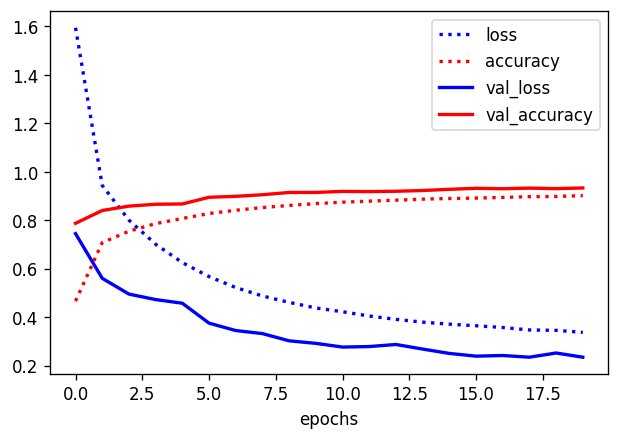

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=5,     # Rotate image up to 40 degrees
    width_shift_range=0.1, # Shift image left-right up to 20% of image width
    height_shift_range=0.1,# Shift image up-down up to 20% of image height
    shear_range=0.1,       # Shear (slant) the image up to 0.2 degrees
)

batch_size = 32
augmented_split = datagen.flow(preprocessed_split[0], preprocessed_split[2], batch_size=batch_size), preprocessed_split[1], preprocessed_split[3]
steps = int(X_train.shape[0] / batch_size)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, steps_per_epoch=steps, generator=True,
               train=True, epochs=20, batch_size=batch_size)
answer_q_2_2 = """
               I experimented with the settings rotation, zoom, flip, shift and shear. Most of them had no effect, except for shear and shift.
               The shear effect worked best, which makes sense as the pictures are taken slightly angled.
               Height and width shift also work well, centering the numbers, e.g. multiple numbers are displayed on the image. Overall, the model performs only 2% to 3% better.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
from sklearn.metrics import confusion_matrix

network = load_model_from_file(base_dir, 'model_2_2')

X_test_p = rgb2gray(X_test)

_, test_acc = network.evaluate(X_test_p, y_test)
y_pred = network.predict(X_test_p)
test_accuracy_3_1 = test_acc

streetview_classes = np.unique(np.argmax(y_test, axis=1))

def plot_confusion_matrix():
    cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(streetview_classes, rotation=45, ha="right")
    ax.set_yticklabels(streetview_classes)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
    plot_nr = 15
    fig, axes = plt.subplots(1, plot_nr,  figsize=(20, 5))
    plot_misclassifications_for_class(label=0, axes=axes, plot_nr=plot_nr)
    plt.show();

def plot_misclassifications_for_class(label, axes, plot_nr):
    misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
    np.random.shuffle(misclassified_samples)
    i = 0
    nr = 0
    while nr < plot_nr:
        ind = misclassified_samples[i]
        if (np.argmax(y_test[ind])+1)%10 == label:
            axes[nr].imshow(X_test[ind])
            axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[ind]) + 1)%10, (np.argmax(y_test[ind]) + 1)%10))
            axes[nr].set_xticks(()), axes[nr].set_yticks(())
            nr += 1
        i += 1

answer_q_3_1 = """
               The labels 6 and 9 are often confused with the label 0. As the data contains more 0 images and the numbers are similar for the human eye, this makes sense.
               The label 0 is overall most often confused with other labels.
               As a 0 cannot occur on its own, I would guess that the number is often confused with a different number displayed on the image. 
               This is visible from the displayed images. Also noisiness plays a role, as the 0 cannot be easily distinguished by the human eye in some images.
               The background interferes too, as visible on the 4th last picture, due to shadow.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 665 characters long


### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [32]:
def plot_activations():
    X_test_p = rgb2gray(X_test)
    img_tensor = X_test_p[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    
    model = load_model_from_file(base_dir, 'model_2_2')

    # Extracts the outputs of the top 8 layers:
    layer_outputs = [layer.output for layer in model.layers[:8]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    # This will return a list of 5 Numpy arrays:
    # one array per layer activation
    activations = activation_model.predict(img_tensor)
    images_per_row = 16

    layer_names = []
    for layer in model.layers[:15]:
        layer_names.append(layer.name)

    plot_act(0, activations, layer_names, model, images_per_row)
    plot_act(3, activations, layer_names, model, images_per_row)

def plot_act(layer_index, activations, layer_names, model, images_per_row):
    start = layer_index
    end = layer_index+1

    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

answer_q_3_2 = """
               The first layer shows that the round edges of the 8 are activated. Also the holes of the 8 are activated.
               The second layer show again activations of the round edges of the 8, certain filters more abstract with lines than others with round shapes. The hole activation is also still visible.
               The activations of these features shows that the model is learning well, but some filters activate the background, which is not that great.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 491 characters long


### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

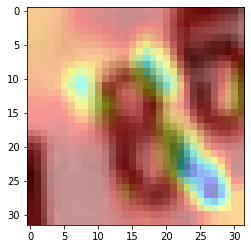

In [0]:
from tensorflow.keras import backend as K
import cv2
tf.compat.v1.disable_eager_execution()

def plot_3_3():
    X_test_p = rgb2gray(X_test)
    img_p = X_test_p[0]
    img_tensor = np.expand_dims(img_p, axis=0)

    model = load_model_from_file(base_dir, 'model_2_2')

    heatmap = plot_activation_map(img_tensor, model)

    heatmap = cv2.resize(heatmap, (img_p.shape[0], img_p.shape[1]))
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    plt.imshow(img_p.reshape(32, 32), cmap="gray")

    plt.imshow(heatmap, cmap='jet', alpha=0.4)

def plot_activation_map(img_tensor, model):
    
    eight_output = model.output[:, 7]
    last_conv_layer = model.get_layer('conv2d_25')
    grads = K.gradients(eight_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
    for i in range(64):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    return heatmap

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 35s 554us/sample - loss: 0.1889 - acc: 0.9311 - val_loss: 0.1478 - val_acc: 0.9447
Epoch 2/10
63544/63544 [==============================] - 32s 505us/sample - loss: 0.1348 - acc: 0.9500 - val_loss: 0.1277 - val_acc: 0.9523
Epoch 3/10
63544/63544 [==============================] - 32s 502us/sample - loss: 0.1177 - acc: 0.9567 - val_loss: 0.1169 - val_acc: 0.9566
Epoch 4/10
63544/63544 [==============================] - 32s 501us/sample - loss: 0.1069 - acc: 0.9608 - val_loss: 0.1099 - val_acc: 0.9594
Epoch 5/10
63544/63544 [==============================] - 32s 501us/sample - loss: 0.0991 - acc: 0.9638 - val_loss: 0.1036 - val_acc: 0.9617
Epoch 6/10
63544/63544 [==============================] - 32s 502us/sample - loss: 0.0926 - acc: 0.9664 - val_loss: 0.1039 - val_acc: 0.9618
Epoch 7/10
63544/63544 [==============================] - 32s 502us/sample - loss: 0.

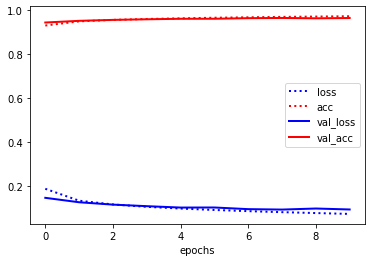

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_4_1():
    conv_base = VGG16(weights='imagenet',
              include_top=False, input_shape=(32, 32, 3))
    
    conv_base.trainable = True
    set_trainable = False
    for layer in conv_base.layers:
        if layer.name == 'block5_conv1':
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(10, activation="softmax"))
    
    model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=0.00001),
                metrics=['acc'])
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=10, batch_size=32)
answer_q_4_1 = """
               I tried end-to-end tuning with one dense layer which did not improve the performance significantly. 
               Therefore I tried fine-tuning by unfreezing the last block of convolutional layers. 
               This method improved the performance significantly with an increase of accuracy of +- 0.03 within 10 epochs.
               The curve is smooth and no overfitting is shown.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [34]:
import pickle
import gzip
from keras.preprocessing.image import ImageDataGenerator

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from tqdm import tqdm_notebook as tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    model = load_model_from_file(base_dir, 'model_4_1')

    # Remove dense layer and output layer
    model.pop()
    model.pop()

    train_features, train_labels = extract_features(model, X_train, y_train, 32)
    train_features = np.reshape(train_features, (X_train.shape[0], 512))
    store_embedding(train_features, "train")
    
    test_features, test_labels = extract_features(model, X_test, y_test, 32)
    test_features = np.reshape(test_features, (X_test.shape[0], 512))
    store_embedding(test_features, "test")

    validation_features, validation_labels = extract_features(model, X_val, y_val, 32)
    validation_features = np.reshape(validation_features, (X_val.shape[0], 512))
    store_embedding(validation_features, "val")

def generate_pipeline():
    """ Returns an sklearn pipeline.
    """
    return make_pipeline(None, SVC())

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
        evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    pipeline.fit(X_train, y_train)
    accuracy = pipeline.score(X_test, y_test)
    return accuracy

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    X_train_r = load_embedding("train")[:5000, :]
    y_train_r = [np.argmax(label) for label in y_train][:5000]
    X_test_r = load_embedding("test")[:2000, :]
    y_test_r = [np.argmax(label) for label in y_test][:2000]
    
    pipeline = generate_pipeline()

    return evaluate_pipeline(pipeline, X_train_r, y_train_r, X_test_r, y_test_r)

def extract_features(conv_base, X, y, batch_size):
    features = np.zeros(shape=(X.shape[0], 512))
    labels = np.zeros(shape=(y.shape[0], 10))
    datagen = ImageDataGenerator()
    generator = datagen.flow(X, y, batch_size=batch_size)
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= X.shape[0]:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

answer_q_4_2 = """
               I experimented with several classifiers, such as LinearRegression, Lasso, Ridge, SVC and Random Forest. Data was transformed to 2D to run these.
               Although SVC performed best out of these methods, all performed bad. 
               I took a sample of 5000 training data and 2000 test data to validate to minimize running time.
               This results in a score of 0.19 accuracy, which is not good. My best model of 4.1 can therefore not be beaten.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('nonetype', None),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 497 characters long
